<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/fakenewsclassifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d algord/fake-news

  0% 0.00/1.68M [00:00<?, ?B/s]
100% 1.68M/1.68M [00:00<00:00, 239MB/s]


In [ ]:
# import zipfile
# zip = zipfile.ZipFile("/content/fake-news.zip",'r')
# zip.extractall("/content")
# zip.close()

In [ ]:
df=pd.read_csv('FakeNewsNet.csv')

In [ ]:
df.shape

(23196, 5)

In [ ]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [ ]:
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


**Data Visualizing & Feature Engineering**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer,HashingVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['real'].unique()

array([1, 0])

In [ ]:
top_source_domains=df['source_domain'].sort_values(ascending=False).unique()[:15]

In [ ]:
df['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

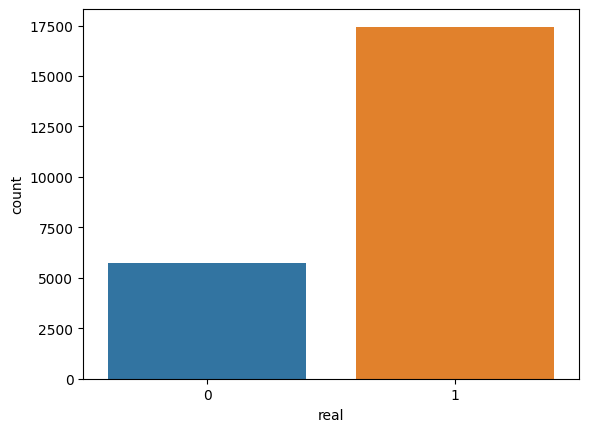

In [ ]:
# Plotting the countplot
sns.countplot(x='real', data=df)

# Display the plot
plt.show()

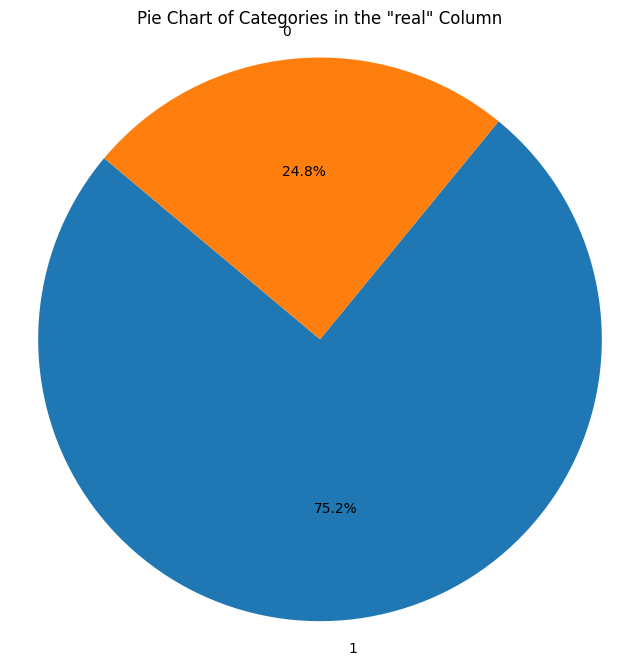

In [ ]:
# Count the occurrences of each category in the 'real' column
category_counts = df['real'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart of Categories in the "real" Column')

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

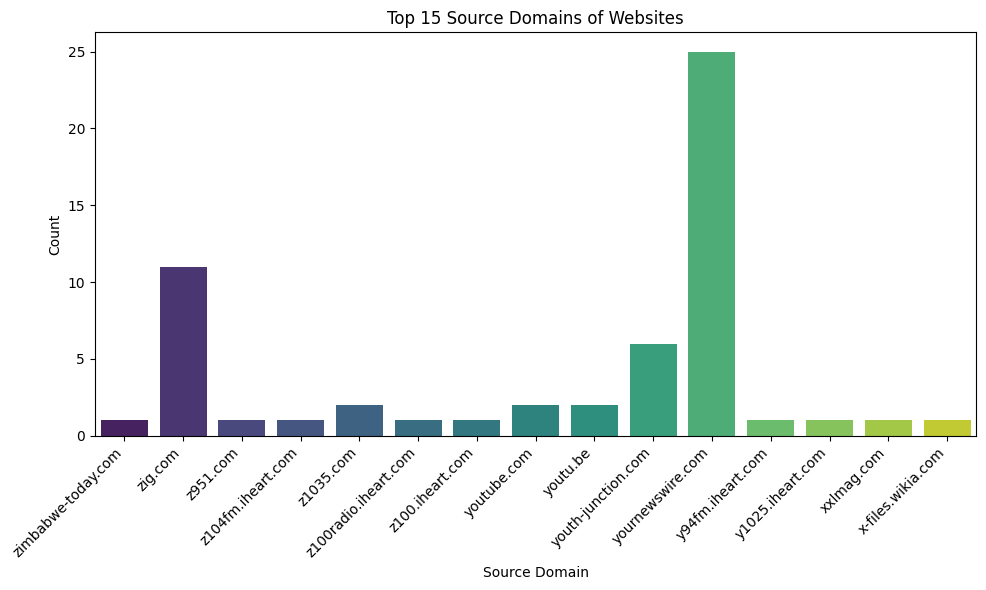

In [ ]:
# Filter the DataFrame to include only the top source domains
filtered_df = df[df['source_domain'].isin(top_source_domains)]

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='source_domain', data=filtered_df, order=top_source_domains, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Source Domain')
plt.ylabel('Count')
plt.title('Top 15 Source Domains of Websites')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
top_tweet_num=df['tweet_num'].sort_values(ascending=False).unique()[:15]

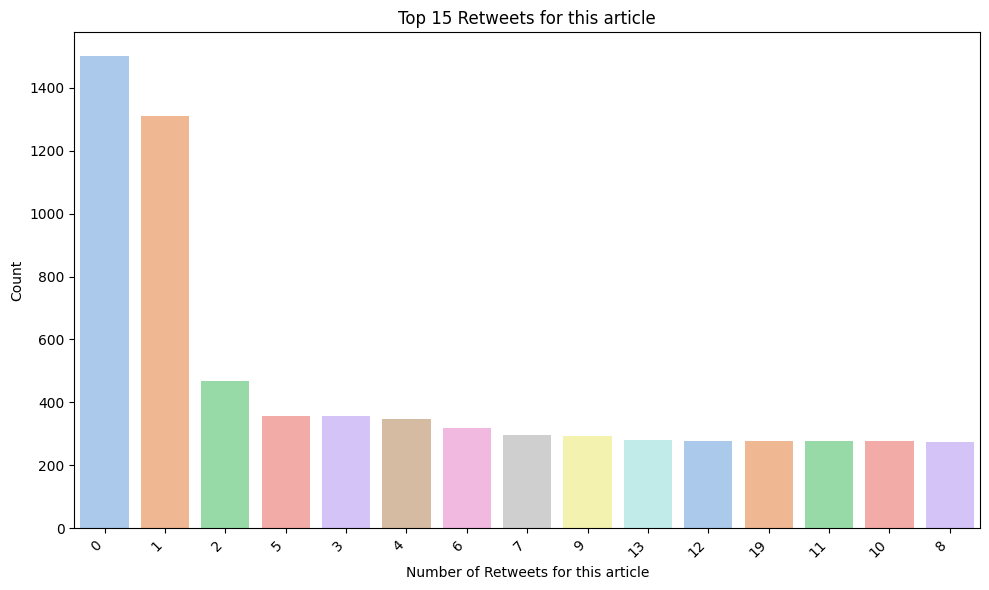

In [ ]:
# List of top 15 tweet numbers based on retweet count
top_tweet_num = df['tweet_num'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top tweet numbers
filtered_df = df[df['tweet_num'].isin(top_tweet_num)]

# Define a different color palette for the barplot
custom_palette = sns.color_palette("pastel")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='tweet_num', data=filtered_df, order=top_tweet_num, palette=custom_palette)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Number of Retweets for this article')
plt.ylabel('Count')
plt.title('Top 15 Retweets for this article')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# df['title'].iloc[1299]
dummy_df=df[['title','real']]

In [ ]:
## Text preprocessing
corpus=[]
for i in range(0,len(dummy_df['title'])):
    reviews=re.sub('[^a-zA-Z]',' ',dummy_df['title'][i])
    reviews=reviews.lower()
    reviews=reviews.split()

    reviews=[ps.stem(word) for word in reviews if not word in stopwords.words('english')]
    reviews=' '.join(reviews)
    corpus.append(reviews)

In [ ]:
reviews

'kelli clarkson perform medley kendrick lamar humbl hit billboard music award'

In [ ]:
reviews

'kelli clarkson perform medley kendrick lamar humbl hit billboard music award'

In [ ]:
corpus[529]

'meghan markl princ harri wed drama faq gossip realli want know'

In [ ]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(23196, 5000)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
cv.get_feature_names_out()[:20]

array(['aaron', 'aaron carter', 'aaron rodger', 'ab', 'abbey', 'abbi',
       'abbi lee', 'abbi lee miller', 'abc', 'abc news', 'abl', 'abraham',
       'absolut', 'abus', 'academi', 'academi award', 'accept',
       'accept speech', 'access', 'accessori'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
count_df.sample(10)

aaron  aaron carter  aaron rodger  ab  abbey  abbi  abbi lee  \
3317       0             0             0   0      0     0         0   
9694       0             0             0   0      0     0         0   
17294      0             0             0   0      0     0         0   
22511      0             0             0   0      0     0         0   
18086      0             0             0   0      0     0         0   
17805      0             0             0   0      0     0         0   
11251      0             0             0   0      0     0         0   
3742       0             0             0   0      0     0         0   
10069      0             0             0   0      0     0         0   
22316      0             0             0   0      0     0         0   

       abbi lee miller  abc  abc news  abl  abraham  absolut  abus  academi  \
3317                 0    0         0    0        0        0     0        0   
9694                 0    0         0    0        0        0     0        0   
17294                0    0         0    0        0        0     0        0   
22511                0    0         0    0        0        0     0        0   
18086                0    0         0    0        0        0     0        0   
17805                0    0         0    0        0        0     0        0   
11251                0    0         0    0        0        0     0        0   
3742                 0    0         0    0        0        0     0        0   
10069                0    0         0    0        0        0     0        0   
22316                0    0         0    0        0        0     0        0   

       academi award  accept  accept speech  access  accessori  accid  \
3317               0       0              0       0          0      0   
9694               0       0              0       0          0      0   
17294              0       0              0       0          0      0   
22511              0       0              0       0          0      0   
18086              0       0              0       0          0      0   
17805              0       0              0       0          0      0   
11251              0       0              0       0          0      0   
3742               0       0              0       0          0      0   
10069              0       0              0       0          0      0   
22316              0       0              0       0          0      0   

       accident  accord  account  accur  accus  accus sexual  ace  achiev  \
3317          0       0        0      0      0             0    0       0   
9694          0       0        0      0      0             0    0       0   
17294         0       0        0      0      0             0    0       0   
22511         0       0        0      0      0             0    0       0   
18086         0       0        0      0      0             0    0       0   
17805         0       0        0      0      0             0    0       0   
11251         0       0        0      0      0             0    0       0   
3742          0       0        0      0      0             0    0       0   
10069         0       0        0      0      1             0    0       0   
22316         0       0        0      0      0             0    0       0   

       acm  acm award  acn  across  act  action  actor  actress  actual  ad  \
3317     0          0    0       0    0       0      0        0       0   0   
9694     0          0    0       0    1       0      0        0       0   0   
17294    0          0    0       0    0       0      0        0       0   0   
22511    0          0    0       0    0       0      0        0       0   0   
18086    0          0    0       0    0       0      0        0       0   0   
17805    0          0    0       0    0       0      0        0       0   0   
11251    0          0    0       0    0       0      0        0       0   0   
3742     0          0    0       0    0       0      0        0       0

In [ ]:
## As we shaw in count_df that in column of accus is present 1 in row no. 795. and finally it's also present in corpus
corpus[795]

'rhoc husband jim edmond slam kelli dodd mistress accus'

In [ ]:
y=dummy_df['real']

In [ ]:
y.shape

(23196,)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_auc_score,roc_curve,classification_report

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
##importing the models
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred_mnb=mnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_mnb)*100

81.37663457393303

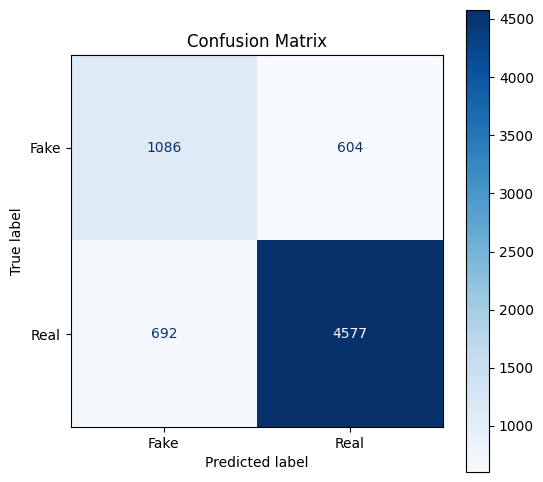

In [ ]:

# Define the class labels
class_labels = ['Fake', 'Real']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_mnb)

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with the custom labels
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Add a title
plt.title('Confusion Matrix')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

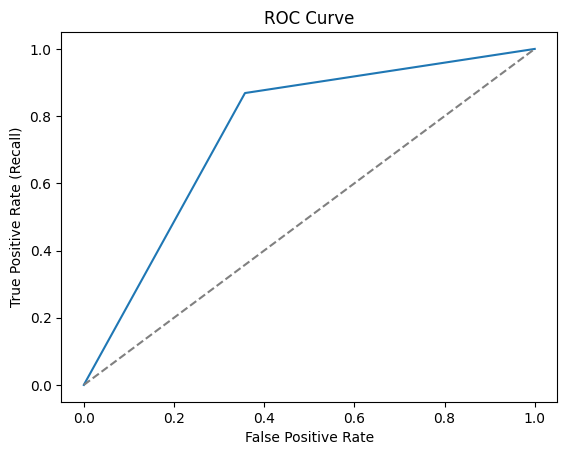

In [ ]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mnb)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Show the plot
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      1690
           1       0.88      0.87      0.88      5269

    accuracy                           0.81      6959
   macro avg       0.75      0.76      0.75      6959
weighted avg       0.82      0.81      0.82      6959



**Passive Aggressive Classifier Algorithms**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

In [ ]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [ ]:
y_pred_lclf=linear_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_lclf)*100

79.07745365713464

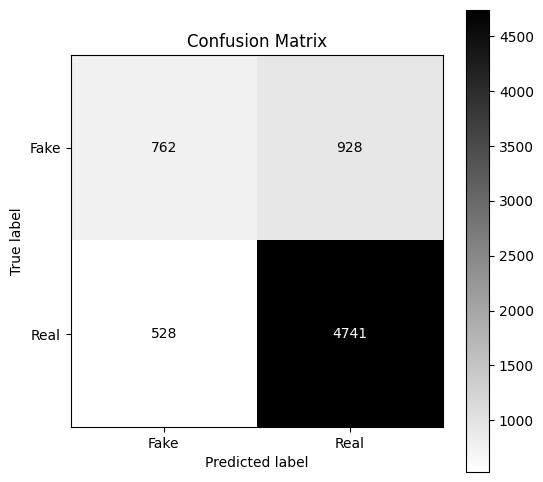

In [ ]:

# Define the class labels
class_labels = ['Fake', 'Real']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lclf)

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with the custom labels
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.binary, ax=ax)

# Add a title
plt.title('Confusion Matrix')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

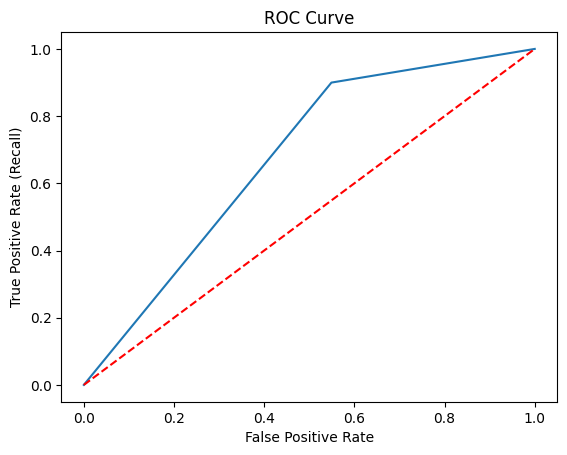

In [ ]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lclf)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Show the plot
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_lclf))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      1690
           1       0.84      0.90      0.87      5269

    accuracy                           0.79      6959
   macro avg       0.71      0.68      0.69      6959
weighted avg       0.78      0.79      0.78      6959



**Hyper Tuning with Both Algorithms**

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
# Set up the grid of hyperparameters to search
param_grid = {
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

In [ ]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with the MultinomialNB classifier
mnb = MultinomialNB()

In [ ]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
# Set up the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform GridSearchCV
grid = GridSearchCV(mnb, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]})

In [ ]:
#Access the best hyperparameters and the tuned model
best_alpha = grid.best_params_['alpha']
best_model = grid.best_estimator_
best_score = grid.best_score_

In [ ]:
# Predict using the tuned model
y_pred_mnbg = best_model.predict(X_test)

In [ ]:
print("Best Alpha Value :- ",best_alpha)
print("Best Alpha Value :- ",best_model)
print("Best Score Value :- ",best_score*100)

Best Alpha Value :-  0.1
Best Alpha Value :-  MultinomialNB(alpha=0.1)
Best Score Value :-  82.42289965272984


**Solving with ANNs and RNNs**

In [117]:
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
import matplotlib.pyplot as plt

Implementing ANN Model

In [118]:
X_train.shape

(16237, 20)

In [124]:
#1. Creating the ANN Model
model_A=Sequential()

model_A.add(Dense(64,activation='relu',input_dim=(20)))
# model_A.add(tensorflow)
model_A.add(Dense(32,activation='relu'))
model_A.add(Dense(16,activation='relu'))
model_A.add(Dense(8,activation='relu'))

model_A.add(Dense(1,activation='sigmoid'))

#2. Compiling the Model
model_A.compile(loss=losses.binary_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
#3. Traing/Fitting our ANN Model
# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(patience=5, monitor='val_loss', min_delta=0.009,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=2)

model_A.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stopping, reduce_lr])

Epoch 1/50
508/508 [==============================] - 3s 2ms/step - loss: 46.9831 - accuracy: 0.6257 - val_loss: 18.5154 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 2/50
508/508 [==============================] - 1s 2ms/step - loss: 15.3317 - accuracy: 0.6334 - val_loss: 10.8858 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 3/50
508/508 [==============================] - 1s 2ms/step - loss: 9.9069 - accuracy: 0.6366 - val_loss: 7.3455 - val_accuracy: 0.6110 - lr: 0.0010
Epoch 4/50
508/508 [==============================] - 1s 2ms/step - loss: 7.3431 - accuracy: 0.6424 - val_loss: 5.4276 - val_accuracy: 0.6622 - lr: 0.0010
Epoch 5/50
508/508 [==============================] - 1s 2ms/step - loss: 5.7325 - accuracy: 0.6377 - val_loss: 6.8724 - val_accuracy: 0.7415 - lr: 0.0010
Epoch 6/50
508/508 [==============================] - 1s 2ms/step - loss: 4.1881 - accuracy: 0.6390 - val_loss: 2.8082 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 7/50
508/508 [==============================] - 1s 2ms/step 

In [ ]:
## Vocabulary Size
voc_size=5000

**One Hot Representation**

In [ ]:
message=dummy_df.copy()

In [ ]:
message.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [ ]:
## Text preprocessing
corpus_1=[]
for i in range(0,len(message['title'])):
    reviews=re.sub('[^a-zA-Z]',' ',message['title'][i])
    reviews=reviews.lower()
    reviews=reviews.split()

    reviews=[ps.stem(word) for word in reviews if not word in stopwords.words('english')]
    reviews=' '.join(reviews)
    corpus_1.append(reviews)

In [ ]:
onehot_repr=[one_hot(words, voc_size) for words in corpus_1]

In [ ]:
onehot_repr[:10]

[[969, 570, 4595, 460, 1707, 722, 1486, 1725, 3958, 194],
 [2208, 4105, 2971, 3986, 3627, 4354, 3292],
 [531,
  363,
  3868,
  1964,
  3087,
  1693,
  3252,
  2471,
  55,
  4205,
  3483,
  2459,
  88,
  2355,
  4774],
 [296, 4003, 1378, 2697, 253, 2879, 3840, 3811],
 [4150, 2797, 4974, 3447, 803, 1402, 4124, 1454, 4756, 867, 1912, 1813, 983],
 [1270, 2740, 777, 3578, 2473, 4481, 1572, 4540, 1417],
 [4979, 798, 4439, 2550, 4154, 337],
 [2616, 2686, 536, 3022, 4411, 825, 1085, 677, 1757, 3255],
 [2683, 4397, 4936, 2135, 2327, 1612, 1661, 3042, 3920, 4162, 4205, 3483],
 [4206, 4421, 4681, 3196, 2715, 4588]]

In [ ]:
sent_lenght=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_lenght)
print(embedded_docs)

[[   0    0    0 ... 1725 3958  194]
 [   0    0    0 ... 3627 4354 3292]
 [   0    0    0 ...   88 2355 4774]
 ...
 [   0    0    0 ...  893 4249 3364]
 [   0    0    0 ... 3835 4191 1417]
 [   0    0    0 ... 1955   24 2971]]


In [ ]:
len(embedded_docs)

23196

In [ ]:
### creating the LSMT model
embedded_vector_features=40

model=Sequential()

model.add(Embedding(voc_size,embedded_vector_features,input_length=sent_lenght))
model.add(LSTM(100))
model.add(tensorflow.keras.layers.BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

### compiling the models
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
## printing the summary of LSTM model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,901
Trainable params: 256,701
Non-trainable params: 200
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(23196, (23196,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((23196, 20), (23196,))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [ ]:
## Finally training our LSTM Model
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=100)

Epoch 1/10
163/163 [==============================] - 9s 43ms/step - loss: 0.4613 - accuracy: 0.7939 - val_loss: 0.5626 - val_accuracy: 0.7571
Epoch 2/10
163/163 [==============================] - 6s 37ms/step - loss: 0.3307 - accuracy: 0.8580 - val_loss: 0.5098 - val_accuracy: 0.7571
Epoch 3/10
163/163 [==============================] - 6s 35ms/step - loss: 0.2744 - accuracy: 0.8848 - val_loss: 0.5282 - val_accuracy: 0.7659
Epoch 4/10
163/163 [==============================] - 6s 35ms/step - loss: 0.2319 - accuracy: 0.9033 - val_loss: 0.4641 - val_accuracy: 0.8054
Epoch 5/10
163/163 [==============================] - 6s 37ms/step - loss: 0.1991 - accuracy: 0.9182 - val_loss: 0.5633 - val_accuracy: 0.7948
Epoch 6/10
163/163 [==============================] - 5s 32ms/step - loss: 0.1721 - accuracy: 0.9331 - val_loss: 0.7593 - val_accuracy: 0.7997
Epoch 7/10
163/163 [==============================] - 6s 39ms/step - loss: 0.1500 - accuracy: 0.9430 - val_loss: 0.9520 - val_accuracy: 0.7915

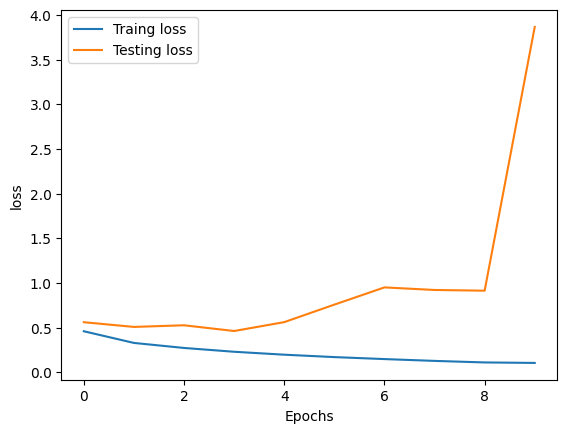

In [ ]:
plt.plot(history.history['loss'],label="Traing loss")
plt.plot(history.history['val_loss'],label="Testing loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

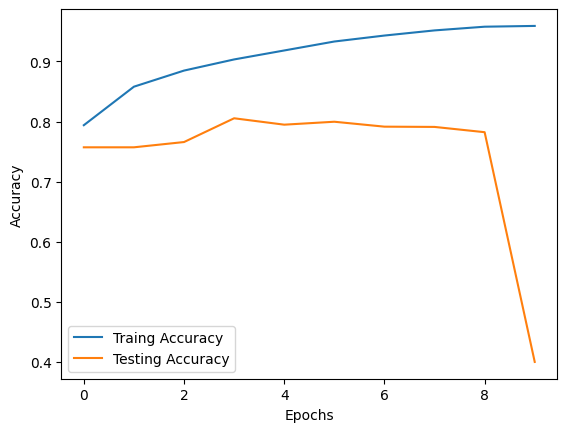

In [ ]:
plt.plot(history.history['accuracy'],label="Traing Accuracy")
plt.plot(history.history['val_accuracy'],label="Testing Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
y_pred_lstm=model.predict(X_test)
len(y_pred_lstm)

218/218 [==============================] - 1s 4ms/step


6959

In [ ]:
len(y_test)

6959

In [ ]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary = (y_pred_lstm >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.40020117833021984


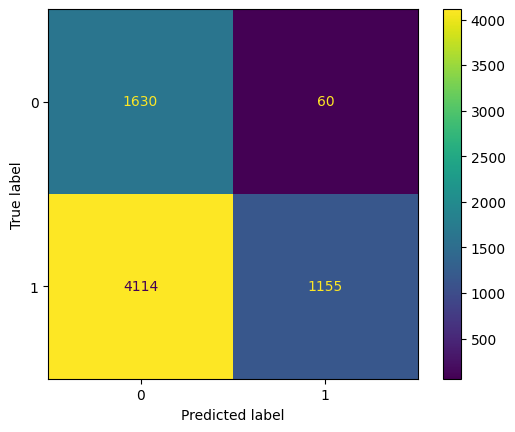

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary)).plot()

<Figure size 800x600 with 0 Axes>

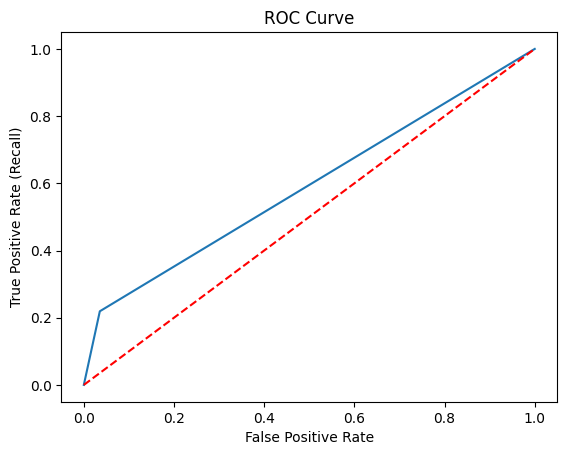

In [ ]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Create the ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')

# Plot the diagonal 50% line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Show the plot
plt.show()

In [104]:
### creating the LSMT model
embedded_vector_features=40

model1=Sequential()

model1.add(Embedding(voc_size,embedded_vector_features,input_length=sent_lenght))
# model1.add(tensorflow.keras.layers.BatchNormalization())
model1.add(tensorflow.keras.layers.Dropout(0.5))

model1.add(LSTM(100,kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model1.add(tensorflow.keras.layers.Dropout(0.5))

model1.add(Dense(1,activation='sigmoid',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))

### compiling the models
model1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## printing the summary of LSTM model
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_6 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# history1=model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=100)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=5,
                                                    restore_best_weights=True)
history1=model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
508/508 [==============================] - 12s 20ms/step - loss: 0.5811 - accuracy: 0.7772 - val_loss: 0.4649 - val_accuracy: 0.8095
Epoch 2/100
508/508 [==============================] - 9s 19ms/step - loss: 0.4140 - accuracy: 0.8348 - val_loss: 0.4354 - val_accuracy: 0.8201
Epoch 3/100
508/508 [==============================] - 10s 19ms/step - loss: 0.3809 - accuracy: 0.8503 - val_loss: 0.4635 - val_accuracy: 0.8099
Epoch 4/100
508/508 [==============================] - 10s 20ms/step - loss: 0.3620 - accuracy: 0.8576 - val_loss: 0.4331 - val_accuracy: 0.8149
Epoch 5/100
508/508 [==============================] - 10s 19ms/step - loss: 0.3510 - accuracy: 0.8636 - val_loss: 0.4622 - val_accuracy: 0.8162
Epoch 6/100
508/508 [==============================] - 10s 19ms/step - loss: 0.3371 - accuracy: 0.8699 - val_loss: 0.4493 - val_accuracy: 0.8202
Epoch 7/100
508/508 [==============================] - 9s 18ms/step - loss: 0.3310 - accuracy: 0.8699 - val_loss: 0.4668 - val_accu

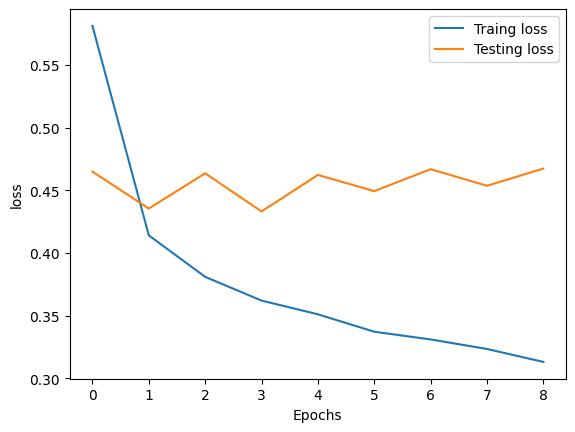

In [106]:
plt.plot(history1.history['loss'],label="Traing loss")
plt.plot(history1.history['val_loss'],label="Testing loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

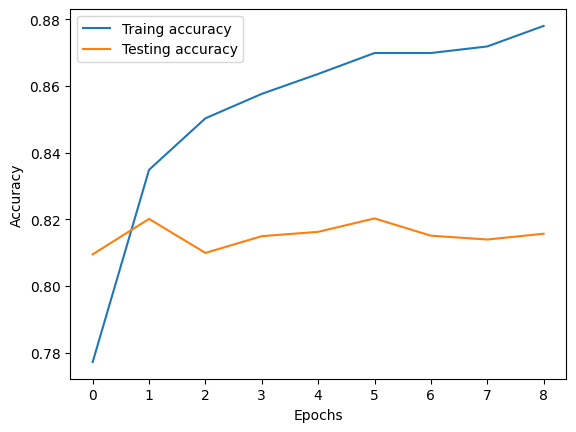

In [107]:
plt.plot(history1.history['accuracy'],label="Traing accuracy")
plt.plot(history1.history['val_accuracy'],label="Testing accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [108]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm

In [114]:
model2 = Sequential()
model2.add(Embedding(voc_size, embedded_vector_features, input_length=sent_lenght))
model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(LSTM(50, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3)))
model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [115]:

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=2)

# Train the model with larger batch size
batch_size = 64
epochs = 50

history2 = model2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
254/254 [==============================] - 6s 16ms/step - loss: 0.5019 - accuracy: 0.7762 - val_loss: 0.4197 - val_accuracy: 0.8155 - lr: 0.0010
Epoch 2/50
254/254 [==============================] - 4s 15ms/step - loss: 0.3718 - accuracy: 0.8401 - val_loss: 0.4152 - val_accuracy: 0.8214 - lr: 0.0010
Epoch 3/50
254/254 [==============================] - 4s 17ms/step - loss: 0.3349 - accuracy: 0.8582 - val_loss: 0.4122 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 4/50
254/254 [==============================] - 4s 14ms/step - loss: 0.3148 - accuracy: 0.8686 - val_loss: 0.4312 - val_accuracy: 0.8174 - lr: 0.0010
Epoch 5/50
254/254 [==============================] - 4s 14ms/step - loss: 0.2968 - accuracy: 0.8765 - val_loss: 0.4354 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 6/50
254/254 [==============================] - 4s 18ms/step - loss: 0.2674 - accuracy: 0.8919 - val_loss: 0.4552 - val_accuracy: 0.8132 - lr: 2.0000e-04
Epoch 7/50
254/254 [==============================] - 4s 14m

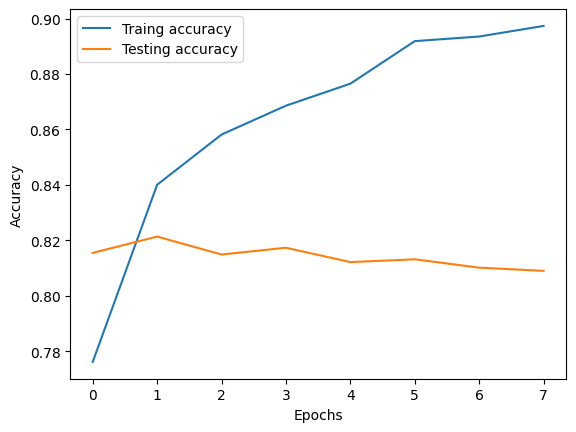

In [116]:
plt.plot(history2.history['accuracy'],label="Traing accuracy")
plt.plot(history2.history['val_accuracy'],label="Testing accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()